# **A Comprehensive Survey of Machine Learning Methods for Text Classification**
## ML Models: IMDB Dataset

#### *Carlos Santiago Bañón, Moazam Soomro*
#### *CAP 6307, Fall '21*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import time
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

## **Loading the Dataset**

---



In [2]:
# Choose the dataset files.
train_file = "./imdb_train.csv"
test_file = "./imdb_test.csv"

In [3]:
# Load the training data.
train = pd.read_csv(train_file)
train.head()

,text,label
0,'s kept asking many fight screaming match swea...,0
1,watch entire movie could watch entire movie st...,0
2,touching love story reminiscent in mood love ...,1
3,latter-day fulci schlocker totally abysmal con...,0
4,first firmly believe norwegian movie continual...,0


In [4]:
# Load the testing data.
test = pd.read_csv(test_file)
test.head()

,text,label
0,really liked summerslam due look arena curtain...,1
1,many television show appeal quite many differe...,1
2,film quickly get major chase scene ever increa...,0
3,jane austen would definitely approve one gwyne...,1
4,expectation somewhat high went see movie thoug...,0


In [5]:
# Show the sizes.
print("Training Set:", train.shape)
print("Test Set:", test.shape)

Training Set: (40000, 2)
Test Set: (10000, 2)


In [6]:
# Separate the text and labels.
X_train = train.text.astype('U')
Y_train = train.label
X_test = test.text.astype('U')
Y_test = test.label

## **Training the Models**

---



In [7]:
# Initialize the metric lists.
acc_list = []
p_list = []
r_list = []
f1_list = []
cm_list = []
time_train_list = []
time_pred_list = []

# Initialize the best result lists.
y_pred_list = []
best_pred_list = []
classifiers = ['LSTM', 'Logistic Regression', 'Support Vector\nMachine', 'Random Forest', 'Decision Tree', 'AdaBoost', 'k-Nearest Neighbors', 'Multinomial\nNaïve Bayes', 'All', 'Top 3']
best_classifiers = []

In [8]:
# Append the results from the LSTM.
acc_list.append(0.9)
p_list.append(0.895)
r_list.append(0.895)
f1_list.append(0.895)
cm_list.append([[4530, 431], [612, 4427]])
time_train_list.append(104.4)

### **Logistic Regression**

In [9]:
# Set up the classifier.
clf_logistic = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', LogisticRegression(max_iter=2000, random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_logistic.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 32.46872019767761


In [10]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_logistic.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)
best_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Num. Iterations:", clf_logistic['classifier'].n_iter_[0])
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 1.1728951930999756


Evaluating...
Num. Iterations: 393
Accuracy: 0.884
Precision: 0.8898590990275849
Recall: 0.8811161328355276
F1 Score: 0.8854660347551343
Confusion Matrix: [[4356  555]
 [ 605 4484]]


In [11]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Support Vector Machine**

In [12]:
# Set up the classifier.
clf_svm = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', LinearSVC(max_iter=5000, random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_svm.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 51.91169238090515


In [13]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_svm.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)
best_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Num. Iterations:", clf_svm['classifier'].n_iter_)
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 1.1565711498260498


Evaluating...
Num. Iterations: 4710
Accuracy: 0.8631
Precision: 0.8700138916451677
Recall: 0.8599450765005885
F1 Score: 0.8649501824997534
Confusion Matrix: [[4247  655]
 [ 714 4384]]


In [14]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Random Forest**

In [15]:
# Set up the classifier.
clf_forest = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', RandomForestClassifier(random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_forest.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 198.5374493598938


In [16]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_forest.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 2.1739439964294434


Evaluating...
Accuracy: 0.8585
Precision: 0.8555268902560031
Recall: 0.8625450180072028
F1 Score: 0.8590216200059778
Confusion Matrix: [[4274  728]
 [ 687 4311]]


In [17]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Decision Tree**

In [18]:
# Set up the classifier.
clf_tree = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', DecisionTreeClassifier(random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_tree.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 94.31160569190979


In [19]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_tree.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 1.1726911067962646


Evaluating...
Accuracy: 0.7244
Precision: 0.7191903155387974
Recall: 0.7299093655589124
F1 Score: 0.7245101959216315
Confusion Matrix: [[3620 1415]
 [1341 3624]]


In [20]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **AdaBoost**

In [21]:
# Set up the classifier.
clf_adaboost = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', AdaBoostClassifier(random_state=42))
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_adaboost.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 17.944806575775146


In [22]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_adaboost.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 1.6196174621582031


Evaluating...
Accuracy: 0.8069
Precision: 0.8340940662829927
Recall: 0.7933182332955833
F1 Score: 0.8131953177904615
Confusion Matrix: [[3866  836]
 [1095 4203]]


In [23]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### ***k*-Nearest Neighbors**

In [24]:
# Set up the classifier.
clf_knn = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', KNeighborsClassifier())
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_knn.fit(X_train, Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 4.776301860809326


In [25]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_knn.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 30.122620582580566


Evaluating...
Accuracy: 0.6359
Precision: 0.6136138122643382
Recall: 0.6460509820309235
F1 Score: 0.6294147582697202
Confusion Matrix: [[3267 1947]
 [1694 3092]]


In [26]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

### **Multinomial Naïve Bayes**

In [27]:
# Set up the classifier.
clf_mnb = Pipeline(steps=[
  ('preprocessing', CountVectorizer()),
  ('classifier', MultinomialNB())
  ])

# Train the model.
print("Training...")
t0 = time.time()
clf_mnb.fit(X_train.to_numpy(), Y_train)
t1 = time.time()
print("Training Time:", t1 - t0)

Training...
Training Time: 4.826166152954102


In [28]:
# Predict from the test set.
print("Predicting...")
t2 = time.time()
y_pred = clf_mnb.predict(X_test)
t3 = time.time()
print("Prediction Time:", t3 - t2)
print("\n")
y_pred_list.append(y_pred)
best_pred_list.append(y_pred)

# Get the performance metrics.
print("Evaluating...")
print("Accuracy:", accuracy_score(y_pred, Y_test))
print("Precision:", precision_score(y_pred, Y_test))
print("Recall:", recall_score(y_pred, Y_test))
print("F1 Score:", f1_score(y_pred, Y_test))
print("Confusion Matrix:", confusion_matrix(y_pred, Y_test))

Predicting...
Prediction Time: 1.1456530094146729


Evaluating...
Accuracy: 0.8573
Precision: 0.841436793014487
Recall: 0.8709942481511914
F1 Score: 0.8559604320177652
Confusion Matrix: [[4333  799]
 [ 628 4240]]


In [29]:
# Save the metrics.
acc_list.append(accuracy_score(y_pred, Y_test))
p_list.append(precision_score(y_pred, Y_test))
r_list.append(recall_score(y_pred, Y_test))
f1_list.append(f1_score(y_pred, Y_test))
cm_list.append(confusion_matrix(y_pred, Y_test))
time_train_list.append(t1 - t0)
time_pred_list.append(t3 - t2)

## **Classifier Ensembles**
---

### **Ensemble #1: Majority Vote from All Classifiers**

In [30]:
num_samples = len(X_test)
num_clf = len(y_pred_list)
total_votes = []

for i in range(num_samples):

  pred = 0

  for y_pred in y_pred_list:
    pred += y_pred[i]

  pred = pred / num_clf

  # Take the majority vote.
  if pred > 0.5:
    pred = 1
  else:
    pred = 0

  total_votes.append(pred)

print("Votes:", total_votes)

Votes: [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [31]:
# Evaluate the ensemble.
print("Evaluating ensemble...")
print("Accuracy:", accuracy_score(total_votes, Y_test))
print("Precision:", precision_score(total_votes, Y_test))
print("Recall:", recall_score(total_votes, Y_test))
print("F1 Score:", f1_score(total_votes, Y_test))
print("Confusion Matrix:", confusion_matrix(total_votes, Y_test))

Evaluating ensemble...
Accuracy: 0.8879
Precision: 0.8952173050208375
Recall: 0.8838166144200627
F1 Score: 0.8894804298531006
Confusion Matrix: [[4368  528]
 [ 593 4511]]


In [32]:
# Save the metrics.
acc_list.append(accuracy_score(total_votes, Y_test))
p_list.append(precision_score(total_votes, Y_test))
r_list.append(recall_score(total_votes, Y_test))
f1_list.append(f1_score(total_votes, Y_test))
cm_list.append(confusion_matrix(total_votes, Y_test))

### **Ensemble #2: Majority Vote from the Top 3 Classifiers**

In [33]:
num_samples = len(X_test)
num_clf = len(best_pred_list)
total_votes = []

for i in range(num_samples):

  pred = 0

  for y_pred in best_pred_list:
    pred += y_pred[i]

  pred = pred / num_clf

  # Take the majority vote.
  if pred > 0.5:
    pred = 1
  else:
    pred = 0

  total_votes.append(pred)

print(total_votes)

[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 

In [34]:
# Evaluate the ensemble.
print("Evaluating ensemble...")
print("Accuracy:", accuracy_score(total_votes, Y_test))
print("Precision:", precision_score(total_votes, Y_test))
print("Recall:", recall_score(total_votes, Y_test))
print("F1 Score:", f1_score(total_votes, Y_test))
print("Confusion Matrix:", confusion_matrix(total_votes, Y_test))

Evaluating ensemble...
Accuracy: 0.8819
Precision: 0.8866838658463981
Recall: 0.879873966128397
F1 Score: 0.883265790254028
Confusion Matrix: [[4351  571]
 [ 610 4468]]


In [35]:
# Save the metrics.
acc_list.append(accuracy_score(total_votes, Y_test))
p_list.append(precision_score(total_votes, Y_test))
r_list.append(recall_score(total_votes, Y_test))
f1_list.append(f1_score(total_votes, Y_test))
cm_list.append(confusion_matrix(total_votes, Y_test))

## **Analysis**
---

In [36]:
# Show the metrics.
print(acc_list)
print(p_list)
print(r_list)
print(f1_list)
print(cm_list)
print(time_train_list)
print(time_pred_list)

[0.9, 0.884, 0.8631, 0.8585, 0.7244, 0.8069, 0.6359, 0.8573, 0.8879, 0.8819]
[0.895, 0.8898590990275849, 0.8700138916451677, 0.8555268902560031, 0.7191903155387974, 0.8340940662829927, 0.6136138122643382, 0.841436793014487, 0.8952173050208375, 0.8866838658463981]
[0.895, 0.8811161328355276, 0.8599450765005885, 0.8625450180072028, 0.7299093655589124, 0.7933182332955833, 0.6460509820309235, 0.8709942481511914, 0.8838166144200627, 0.879873966128397]
[0.895, 0.8854660347551343, 0.8649501824997534, 0.8590216200059778, 0.7245101959216315, 0.8131953177904615, 0.6294147582697202, 0.8559604320177652, 0.8894804298531006, 0.883265790254028]
[[[4530, 431], [612, 4427]], array([[4356,  555],
       [ 605, 4484]]), array([[4247,  655],
       [ 714, 4384]]), array([[4274,  728],
       [ 687, 4311]]), array([[3620, 1415],
       [1341, 3624]]), array([[3866,  836],
       [1095, 4203]]), array([[3267, 1947],
       [1694, 3092]]), array([[4333,  799],
       [ 628, 4240]]), array([[4368,  528],
    

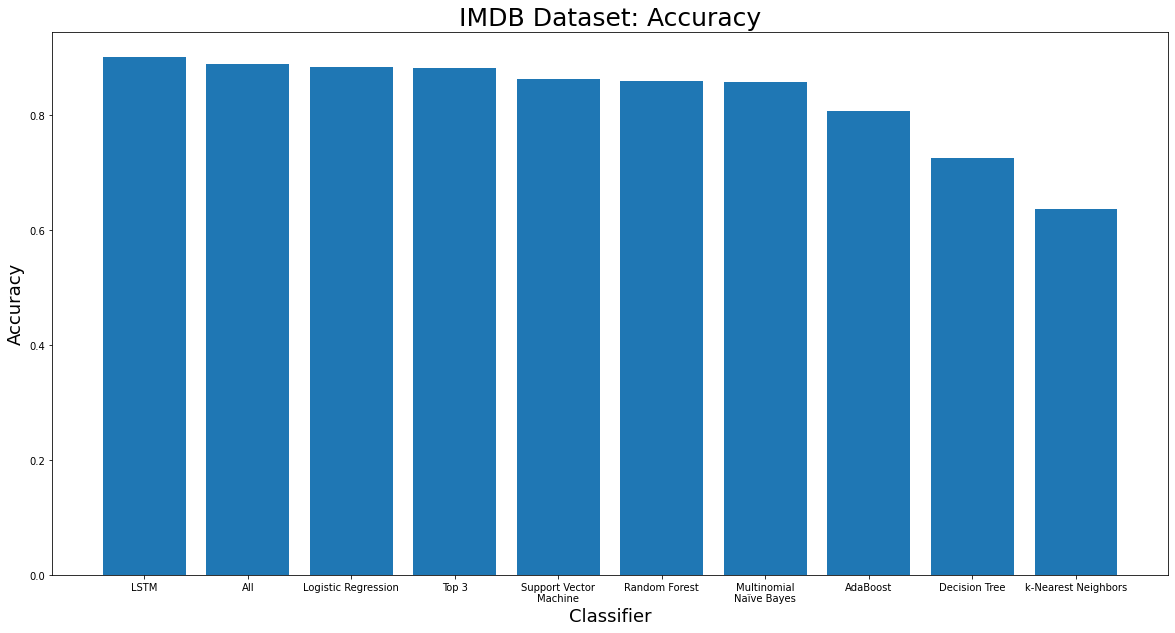

In [37]:
# Plot the accuracies.
acc_classifiers = classifiers
zipped_lists = zip(acc_list, acc_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
acc_list, acc_classifiers = [list(tuple) for tuple in tuples]
plt.figure(figsize=(20, 10))
plt.bar(acc_classifiers, acc_list)
plt.title('IMDB Dataset: Accuracy', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Accuracy', size=18)
plt.show()

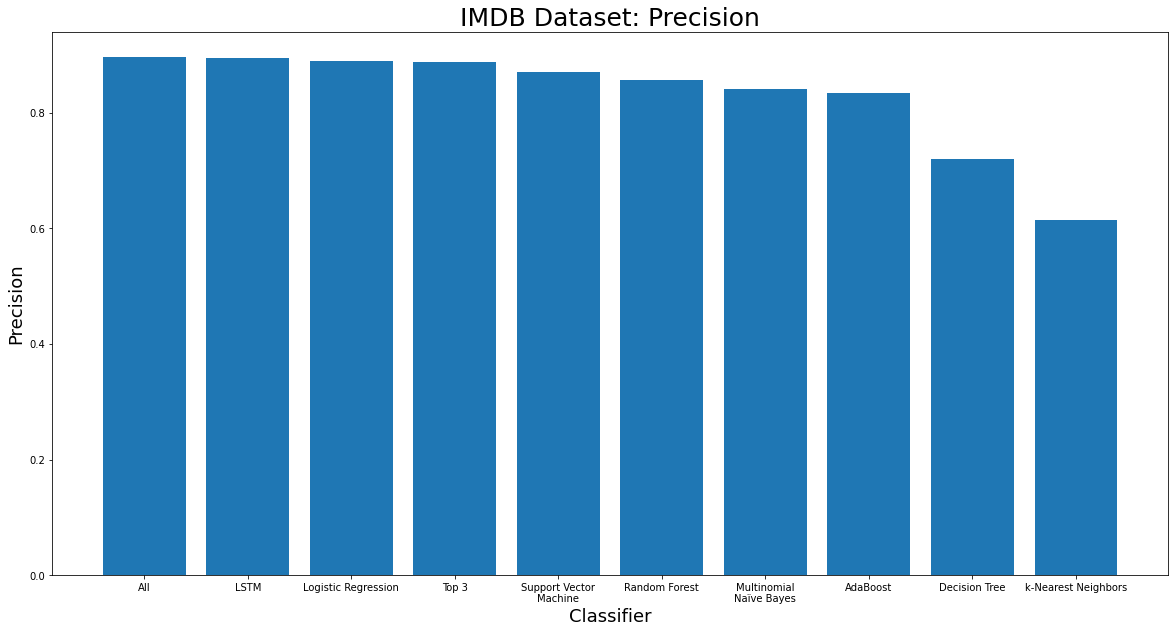

In [38]:
# Plot the precision.
p_classifiers = classifiers
zipped_lists = zip(p_list, p_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
p_list, p_classifiers = [list(tuple) for tuple in tuples]
plt.figure(figsize=(20, 10))
plt.bar(p_classifiers, p_list)
plt.title('IMDB Dataset: Precision', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Precision', size=18)
plt.show()

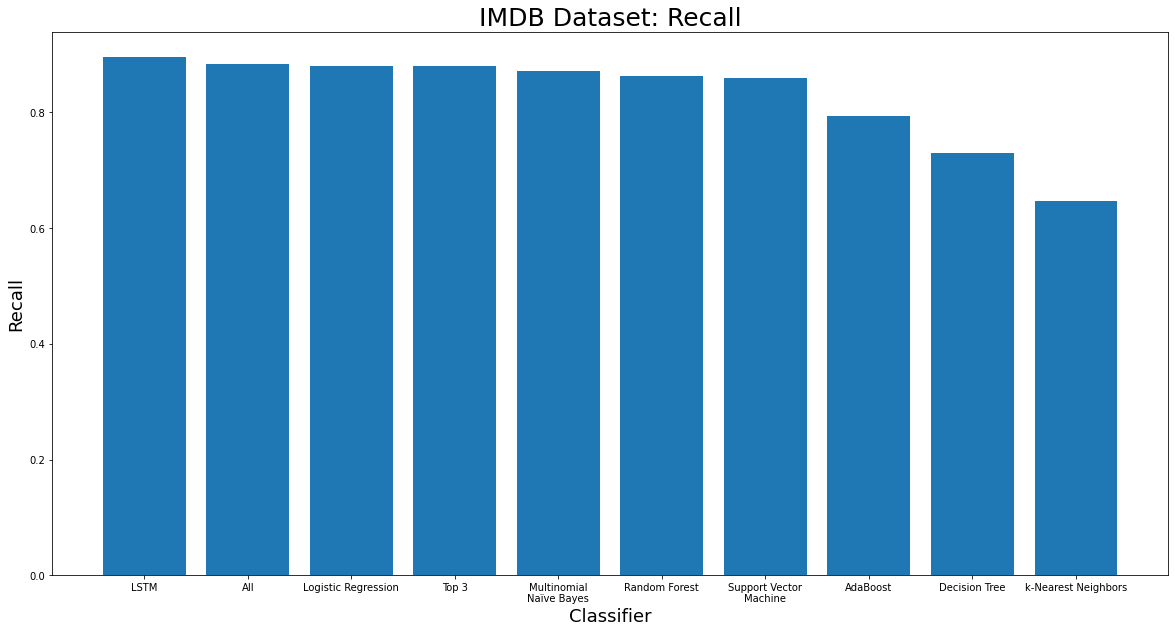

In [39]:
# Plot the recall.
r_classifiers = classifiers
zipped_lists = zip(r_list, r_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
r_list, r_classifiers = [list(tuple) for tuple in tuples]
plt.figure(figsize=(20, 10))
plt.bar(r_classifiers, r_list)
plt.title('IMDB Dataset: Recall', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Recall', size=18)
plt.show()

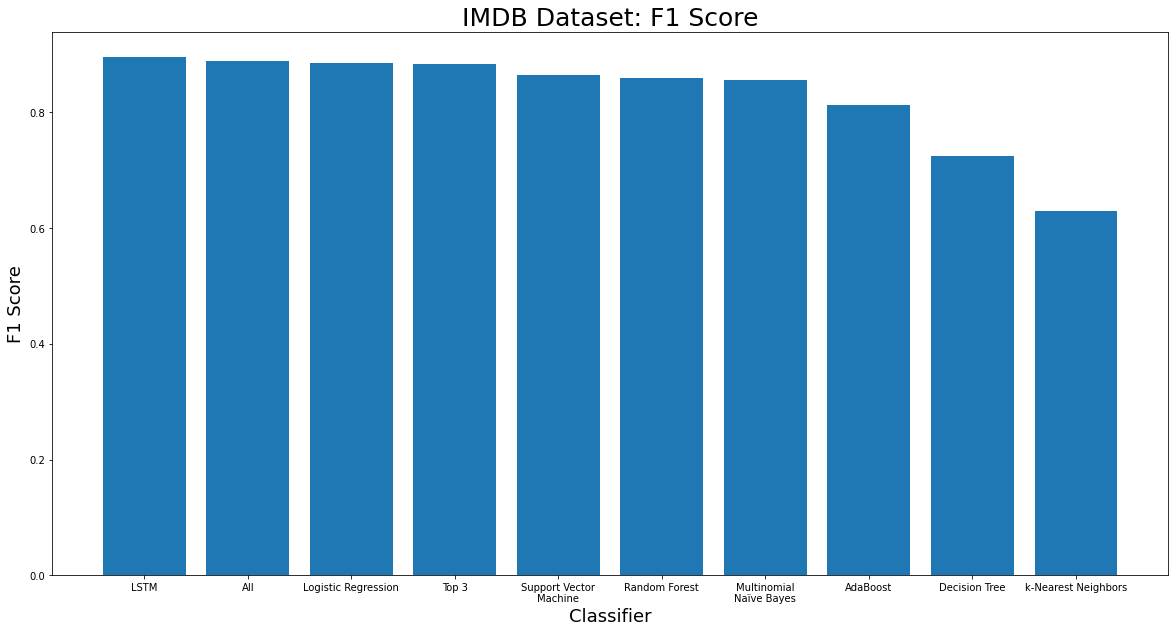

In [40]:
# Plot the F1 scores.
f1_classifiers = classifiers
zipped_lists = zip(f1_list, f1_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
f1_list, f1_classifiers = [list(tuple) for tuple in tuples]
plt.figure(figsize=(20, 10))
plt.bar(f1_classifiers, f1_list)
plt.title('IMDB Dataset: F1 Score', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('F1 Score', size=18)
plt.show()

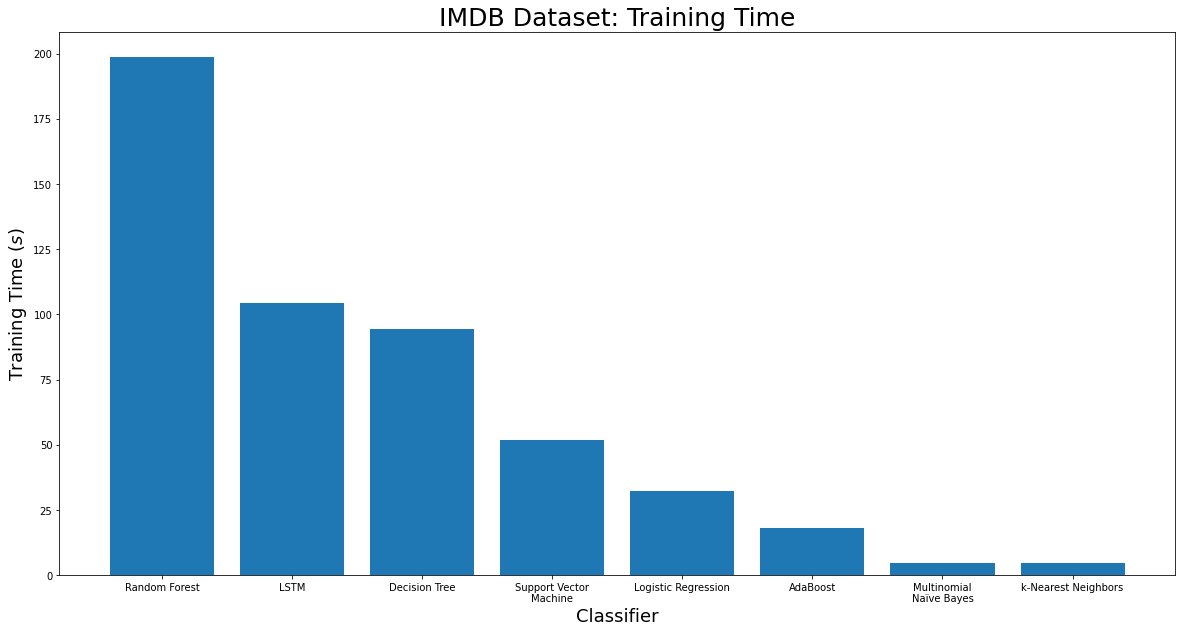

In [41]:
# Plot the training times.
train_classifiers = classifiers[:8]
zipped_lists = zip(time_train_list, train_classifiers)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
time_train_list, train_classifiers = [list(tuple) for tuple in tuples]
plt.figure(figsize=(20, 10))
plt.bar(train_classifiers, time_train_list)
plt.title('IMDB Dataset: Training Time', size=25)
plt.xlabel('Classifier', size=18)
plt.ylabel('Training Time ($s$)', size=18)
plt.show()

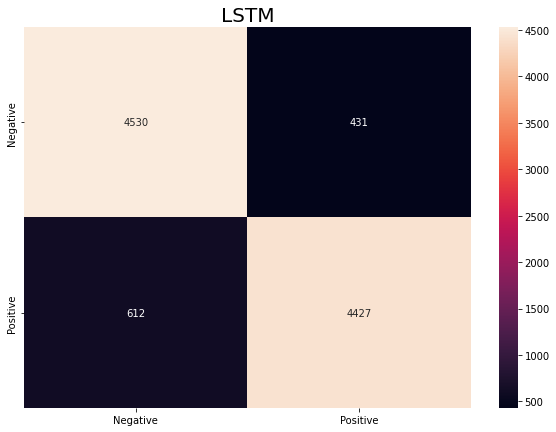

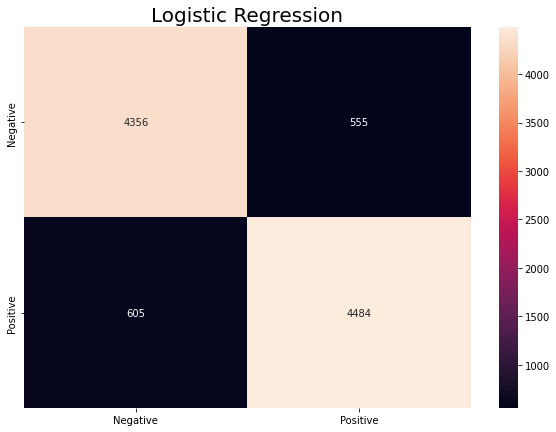

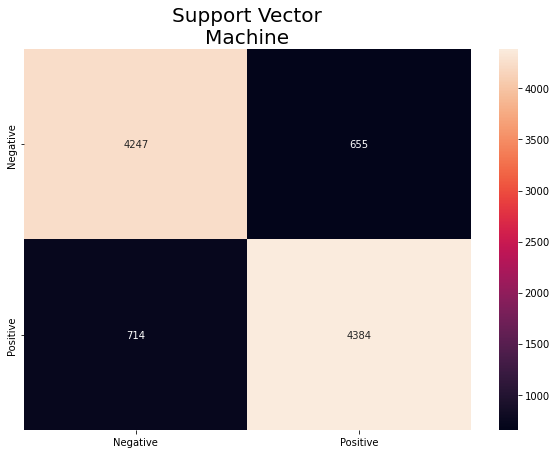

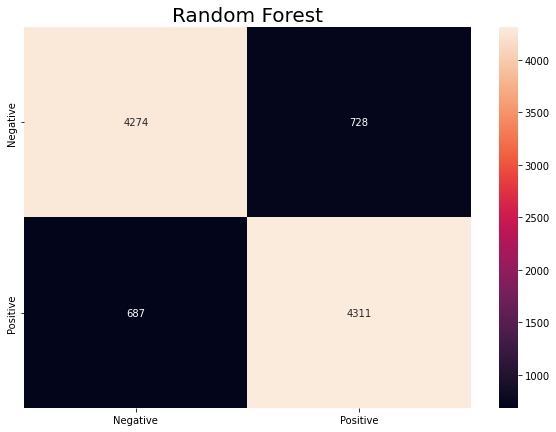

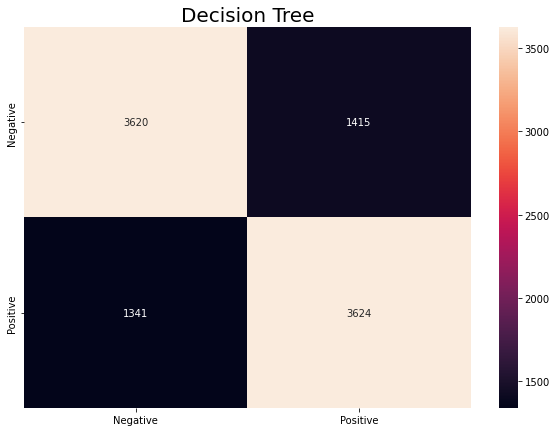

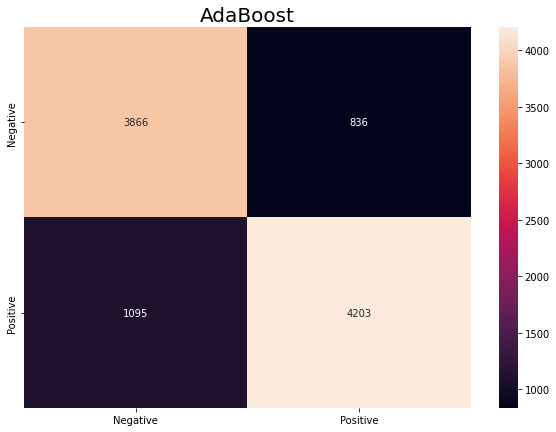

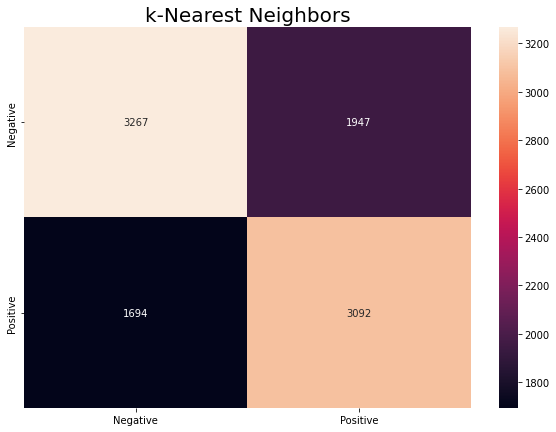

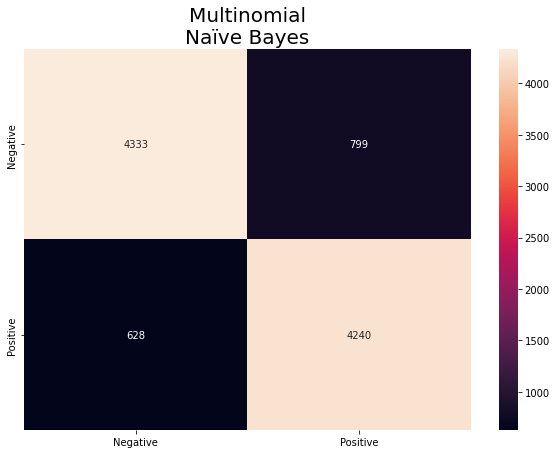

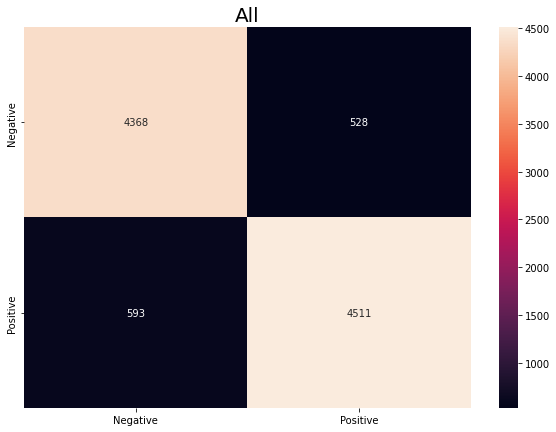

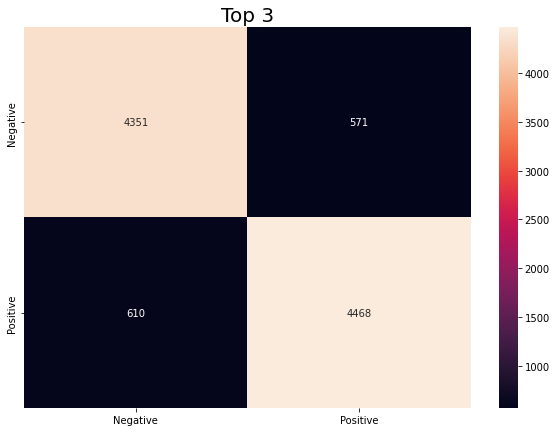

In [42]:
# Plot the confusion matrices.
for i in range(len(classifiers)):
  df_cm = pd.DataFrame(cm_list[i], index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
  plt.figure(figsize = (10,7))
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_title(classifiers[i], size=20)